# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     944.8
Date:                Wed, 19 Feb 2025   Prob (F-statistic):           2.59e-41
Time:                        12:34:51   Log-Likelihood:                0.43447
No. Observations:                  50   AIC:                             7.131
Df Residuals:                      46   BIC:                             14.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8884      0.085     57.348      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.39636399  4.90477057  5.36956434  5.75977805  6.05562037  6.25172755
  6.35804466  6.39819165  6.40558268  6.41793624  6.47107812  6.59305532
  6.79952804  7.09119671  7.45368697  7.85991126  8.27451931  8.65970601
  8.98142275  9.21497149  9.34906254  9.38766948  9.34937628  9.26432401
  9.16925875  9.10149434  9.09278175  9.16409256  9.32217336  9.55843731
  9.8503749  10.16525225 10.46548916 10.71483346 10.88431709 10.95701553
 10.93082839 10.81882456 10.64709498 10.45046599 10.26677747 10.13066583
 10.06787338 10.0910189  10.19752447 10.37003893 10.57928872 10.78888736
 10.9613137  11.06407653]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.06373926 10.9148837  10.63979315 10.28924835  9.93009466  9.62887592
  9.43554225  9.37122049  9.42304162  9.54729155]


## Plot comparison

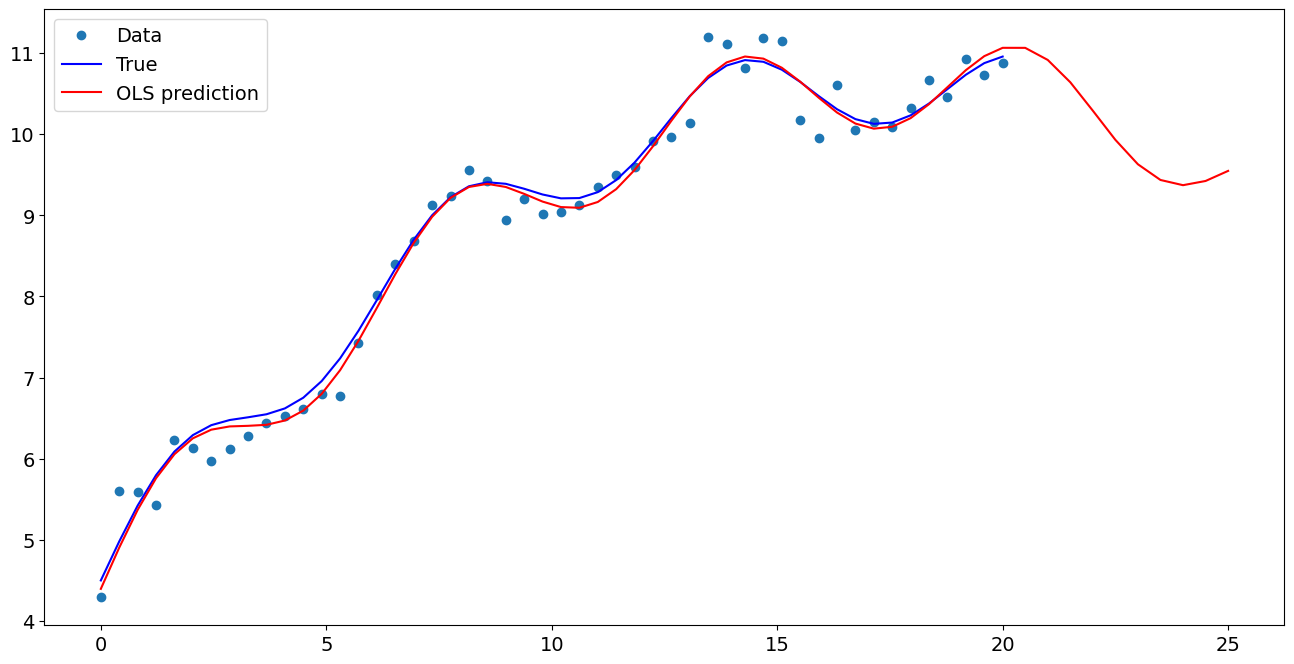

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.888378
x1                  0.504254
np.sin(x1)          0.568216
I((x1 - 5) ** 2)   -0.019681
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.063739
1    10.914884
2    10.639793
3    10.289248
4     9.930095
5     9.628876
6     9.435542
7     9.371220
8     9.423042
9     9.547292
dtype: float64